In [1]:
import h5py
import os
import sys

import cv2
import gspread
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from allensdk.brain_observatory.sync_dataset import Dataset

In [2]:
sys.path.append(r'C:\Users\lesliec\code')

In [3]:
from tbd_eeg.tbd_eeg.data_analysis.eegutils import EEGexp
from tbd_eeg.tbd_eeg.data_analysis.Utilities.behavior_movies import Movie, get_sync_frame_times

In [4]:
recfolder = r'V:\mouseTEST\test_sync_TP2_2024-11-13_09-31-14\experiment1\recording1'
# exp = EEGexp(recfolder, preprocess=True, make_stim_csv=True)
# exp = EEGexp(recfolder, preprocess=True, make_stim_csv=False)
exp = EEGexp(recfolder, preprocess=False, make_stim_csv=False)

No *stim* files were found.
Experiment type: spontaneous


In [7]:
%matplotlib widget

### Test the sync pulses in the video files

In [5]:
sync_data = exp._load_sync_dataset()
print('{} -- {}'.format(exp.mouse, exp.date))

pupilvid = cv2.VideoCapture(exp.pupilmovie_file)
pupilsync = sync_data.get_edges(keys=('eyetracking',), kind='rising', units='seconds')
print(' Pupil: {:d}/{:d}'.format(int(pupilvid.get(cv2.CAP_PROP_FRAME_COUNT)), len(pupilsync)))
if int(pupilvid.get(cv2.CAP_PROP_FRAME_COUNT)) != len(pupilsync):
    print('  extra frames = {:d}'.format(int(pupilvid.get(cv2.CAP_PROP_FRAME_COUNT)) - len(pupilsync)))

bodyvid = cv2.VideoCapture(exp.bodymovie_file)
bodysync = sync_data.get_edges(keys=('behavior',), kind='rising', units='seconds')
print(' Body: {:d}/{:d}'.format(int(bodyvid.get(cv2.CAP_PROP_FRAME_COUNT)), len(bodysync)))
if int(bodyvid.get(cv2.CAP_PROP_FRAME_COUNT)) != len(bodysync):
    print('  extra frames = {:d}'.format(int(bodyvid.get(cv2.CAP_PROP_FRAME_COUNT)) - len(bodysync)))

TEST\t -- 2024-11-13 09:31:14
 Pupil: 5242/5242
 Body: 10477/10477


### Test the iso signal

In [6]:
iso, iso_ts = exp.load_analog_iso()

Text(0.5, 0, 'time (s)')

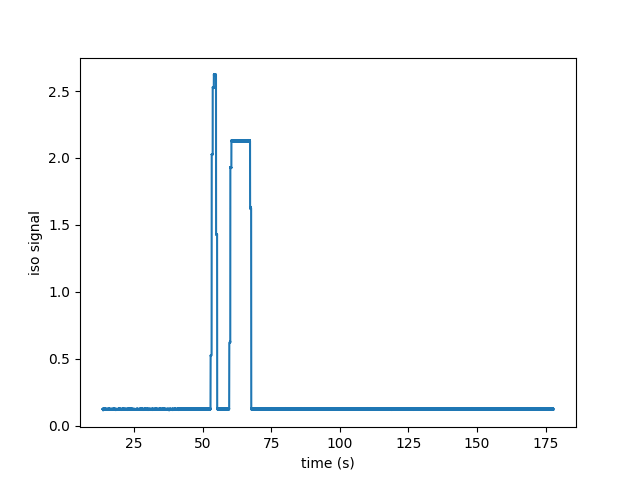

In [8]:
fig, ax = plt.subplots()
ax.plot(iso_ts, iso)
ax.set_ylabel('iso signal')
ax.set_xlabel('time (s)')

### Test the running signal

In [10]:
smooth_speed, linear_speed, speed_ts = exp.load_running()

Text(0.5, 0, 'time (s)')

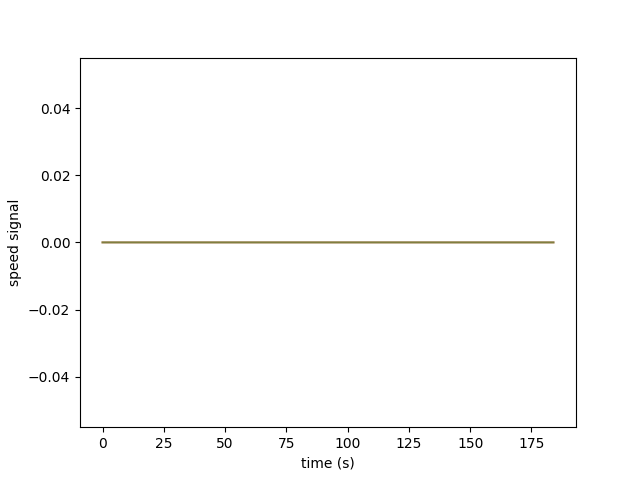

In [11]:
fig, ax = plt.subplots()
ax.plot(speed_ts, linear_speed, color='r', alpha=0.5)
ax.plot(speed_ts, smooth_speed, color='g', alpha=0.5)
ax.set_ylabel('speed signal')
ax.set_xlabel('time (s)')